## 1.4.3 Geometric Transformations of Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
def plt_image(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()
    
def bgr2rgb(bgr):
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

### Scaling

In [11]:
img = cv2.imread('download.png', 0)

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

cv2.imshow('orig', img)
cv2.imshow('dst', res)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Translation

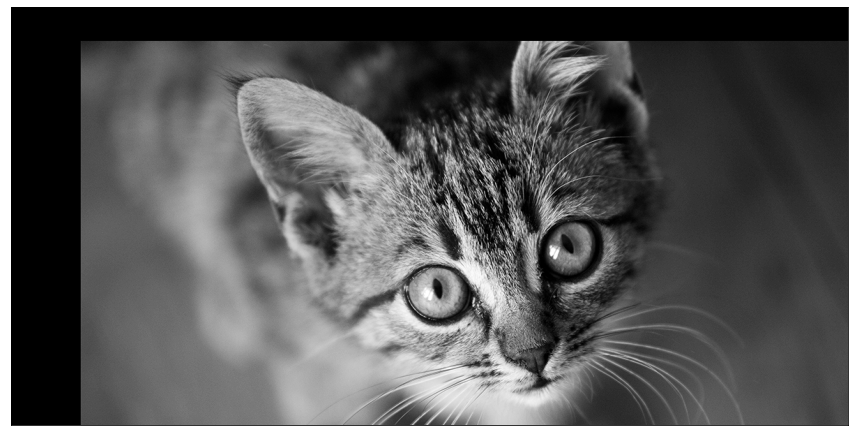

In [6]:
rows, cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt_image(dst)

### Rotation

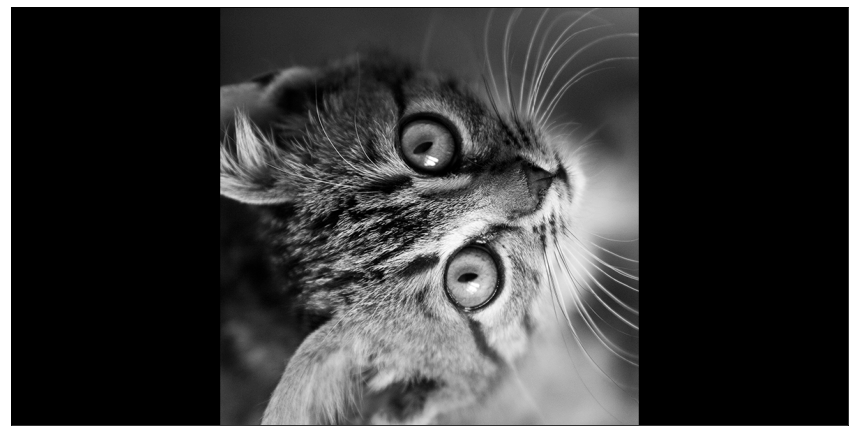

In [15]:
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt_image(dst)

### Affine Transformation

In [18]:
img = cv2.imread('download.png')

rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

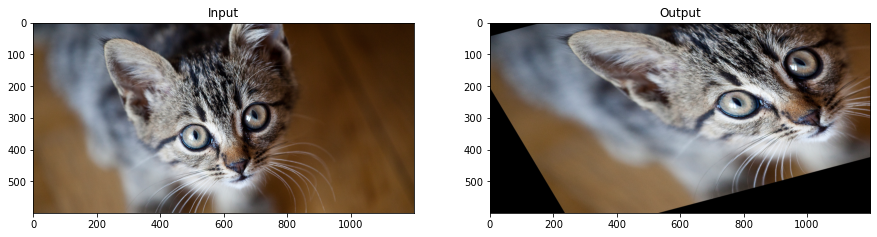

In [31]:
plt.subplot(121),plt.imshow(bgr2rgb(img)),plt.title('Input')
plt.subplot(122),plt.imshow(bgr2rgb(dst)),plt.title('Output')
plt.show()

### Perspective Transformation

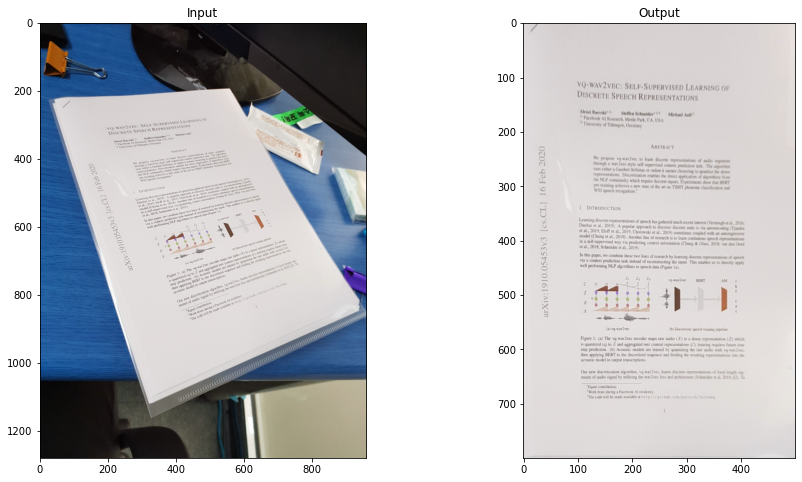

In [33]:
img = cv2.imread('lens.jpeg')
rows,cols,ch = img.shape
pts1 = np.float32([[46, 239],[550,200],[935,825],[320,1110]])
pts2 = np.float32([[0,0],[500,0],[500,800],[0, 800]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img, M, (500,800))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()